In [1]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path
import arch as arch

%matplotlib inline

In [2]:
#Other Imports 
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
#file_path = Path('PrivateEquityReturns.csv')
#pe_df = pd.read_csv(file_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
#pe_df

In [4]:
file_path = Path('PrivateEquityReturnsFinal.csv')
pe_df = pd.read_csv(file_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
pe_df

,Index,Quarter,Private Equity Returns,Cumulative,100,Unnamed: 6,Unnamed: 7
Date,,,,,,,
1986-06-30,1986 Q2,Q2,4.22,104.22,104.22,NaN,NaN
1986-09-30,1986 Q3,Q3,-2.60,101.62,101.62,NaN,NaN
1986-12-31,1986 Q4,Q4,1.11,102.73,102.73,NaN,NaN
1987-03-31,1987 Q1,Q1,3.73,106.46,106.46,NaN,NaN
1987-06-30,1987 Q2,Q2,1.28,107.74,107.74,NaN,NaN
...,...,...,...,...,...,...,...
2018-09-30,2018 Q3,Q3,3.84,532.50,532.50,NaN,NaN
2018-12-31,2018 Q4,Q4,-1.95,530.55,530.55,NaN,NaN
2019-03-31,2019 Q1,Q1,4.89,535.44,535.44,NaN,NaN


In [5]:
df = pd.DataFrame(pe_df['Private Equity Returns'])
df

,Private Equity Returns
Date,
1986-06-30,4.22
1986-09-30,-2.60
1986-12-31,1.11
1987-03-31,3.73
1987-06-30,1.28
...,...
2018-09-30,3.84
2018-12-31,-1.95
2019-03-31,4.89


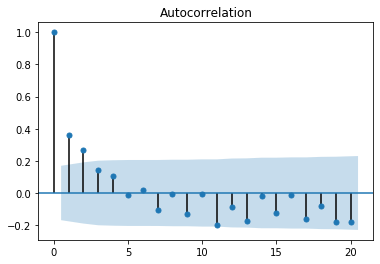

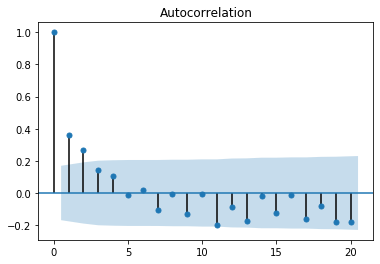

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df, lags=20)

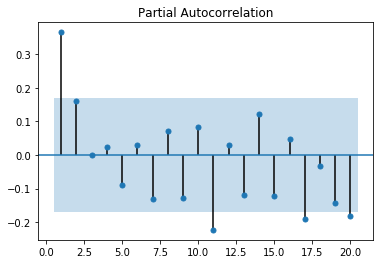

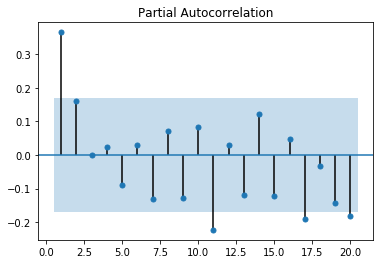

In [7]:
plot_pacf(df, zero=False, lags=20)

In [8]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['Private Equity Returns'], order=(2, 1, 2))

/Users/Devin/opt/anaconda3/envs/anaconda_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
/Users/Devin/opt/anaconda3/envs/anaconda_env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


In [9]:
results = model.fit()

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                 
====================================================================================
Dep. Variable:     D.Private Equity Returns   No. Observations:                  133
Model:                       ARIMA(2, 1, 2)   Log Likelihood                -375.442
Method:                             css-mle   S.D. of innovations              4.004
Date:                      Sat, 06 Jun 2020   AIC                            762.883
Time:                              17:04:07   BIC                            780.225
Sample:                          09-30-1986   HQIC                           769.930
                               - 09-30-2019                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0005      0.016     -0.030      0.976      -0.031       0.030
ar.L1.D.Private Equity Returns    -0.5428      0.082     -6.602      0.000      -0.704      -0.382
ar.L2.D.Private Equity Returns     0.4392      0.079      5.582      0.000       0.285       0.593
ma.L1.D.Private Equity Returns    -0.0521      0.041     -1.257      0.209      -0.133       0.029
ma.L2.D.Private Equity Returns    -0.9478      0.041    -23.211      0.000      -1.028      -0.868
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0126           +0.0000j            1.0126            0.5000
AR.2            2.2487           +0.0000j            2.2487            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0550           +0.0000j            1.0550            0.5000
-----------------------------------------------------------------------------
"""

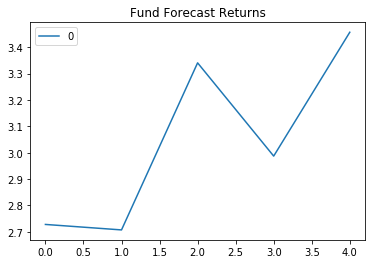

In [11]:
# Visualize the forecast
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Fund Forecast Returns")

In [12]:
###ARMA

In [13]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

In [14]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model_2 = ARMA(df['Private Equity Returns'].values, order=(1,1))

In [15]:
# Fit the model to the data
results_2 = model_2.fit()

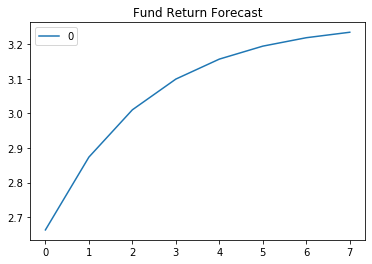

In [16]:
# Plot the forecasted return for the next 10 days
pd.DataFrame(results_2.forecast(steps=8)[0]).plot(title="Fund Return Forecast")

In [17]:
# Summarize the model
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  134
Model:                     ARMA(1, 1)   Log Likelihood                -379.716
Method:                       css-mle   S.D. of innovations              4.113
Date:                Sat, 06 Jun 2020   AIC                            767.431
Time:                        17:04:15   BIC                            779.022
Sample:                             0   HQIC                           772.141
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2636      0.670      4.874      0.000       1.951       4.576
ar.L1.y        0.6496      0.141      4.605      0.000       0.373       0.926
ma.L1.y       -0.3333      0.170     -1.955      0.051      -0.667       0.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5393           +0.0000j            1.5393            0.0000
MA.1            3.0007           +0.0000j            3.0007            0.0000
-----------------------------------------------------------------------------
"""